<a href="https://colab.research.google.com/github/PaulToronto/Hands-on-Maching-Learning-Book/blob/main/3_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml

from sklearn.linear_model import SGDClassifier
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import cross_val_score, cross_val_predict

from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, r2_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, precision_recall_curve
from sklearn.metrics import roc_curve, roc_auc_score

## `sklearn.datasets`

- Mostly 3 types of functions:
    1. `fetch_*`: such as `fetch_openml()` for real-life datasets
    2. `load_*`: to load small toy datasets
    3. `make_*`: to generate fake dataset
- Generated datasets are often returned as an `(X,y)` tuple of NumPy arrays
- Other datasets are returned as `sklearn.utils.Bunch` objects which are dictionaries which generally contain the following keys:
    - `"DESCR"`
    - `"data"`, the input data, usually a Numpy Array
    - `"target"`
- `fetch_openml()` returns the inputs as a Pandas DataFrame and the labels as a Pandas Series
    - but the MNIST dataset contains images, so it is best to set `as_frame=False` to get the data as Numpy arrays instead

## MNIST

In [2]:
# from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784')

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [3]:
mnist.data

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
mnist.target

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [5]:
mnist = fetch_openml('mnist_784', as_frame=False)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [6]:
X, y = mnist.data, mnist.target

In [7]:
X.shape, X

((70000, 784),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]))

In [8]:
y.shape, y

((70000,), array(['5', '0', '4', ..., '4', '5', '6'], dtype=object))

In [9]:
def plot_digit(image_data, label_data=None):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap='binary')
    plt.axis('off')
    if label_data:
        plt.title(label_data)

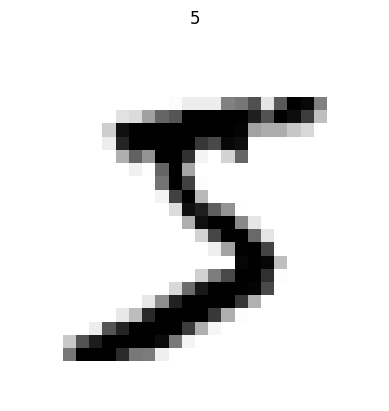

In [10]:
plot_digit(X[0], y[0])

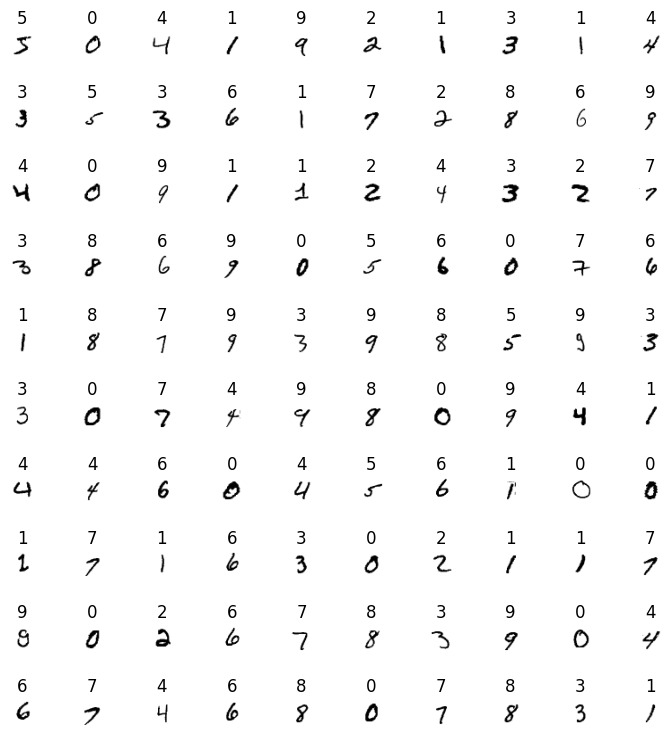

In [11]:
plt.figure(figsize=(9, 9))
for idx, image_data in enumerate(X[:100]):
    plt.subplot(10, 10, idx + 1)
    plot_digit(image_data, y[idx])
plt.subplots_adjust(wspace=0, hspace=2)
plt.show()

## Train, Test Split

- the MNIST data returned by `fetch_openml()` is already split for us
    - the first 60000 rows are the train set
    - the last 10000 rows are the test set
    - some learning algorithms are sensitive to the order of the training instances
        - the training set is already shuffled for us
        - shuffling is not always a good idea (example: time series data)

In [12]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((60000, 784), (10000, 784), (60000,), (10000,))

## Training a Binary Classifier

- We simplify the problem by turning it into a "5" detector, which is a binary classification problem

In [13]:
y_train_5 = y_train == '5'
y_test_5 = y_test == '5'

In [14]:
y_train_5, y_test_5

(array([ True, False, False, ...,  True, False, False]),
 array([False, False, False, ..., False,  True, False]))

### `SGDClassifier()`

- stochastic gradient descent classifier
- capable of handling very large datasets efficiently
    - in part because SGD deals with training instances independently, one at a time, so it is well suited for online learning

In [15]:
# from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [16]:
sgd_clf.predict([X[0]])

array([ True])

In [17]:
y[0]

'5'

### Performance Measures

#### Measuring Accuracy Using Cross-Validation

##### `cross_val_score`

In [18]:
# from sklearn.model_selection import cross_val_score


# by default, there is no shuffling so the splits will be
#  the same across calls
cross_val_score(sgd_clf,
                X_train,
                y_train_5,
                cv=3,
                scoring='accuracy')

array([0.95035, 0.96035, 0.9604 ])

Those seem like a good scores, all over 95%, but the target is imbalanced


In [19]:
pd.Series(y_train_5).value_counts(normalize=True)

False    0.90965
True     0.09035
dtype: float64

It is a good idea to try it with `DummyClassifier`, which, with the default settings, just classifies each images as being in the most frequent class.

In [20]:
# from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier()
dummy_clf.fit(X_train, y_train_5)

DummyClassifier()

In [21]:
any(dummy_clf.predict(X_train))

False

In [22]:
cross_val_score(dummy_clf,
                X_train,
                y_train_5,
                cv=3,
                scoring='accuracy')

array([0.90965, 0.90965, 0.90965])

The fact that we got over 90% accuracy with the Dummy Classifier demonstrates why accuracy is generally not the preferred performance measure for classifiers, especially with *skewed datasets*. A much better way to evaluate the performce of a classifier is to look at the **confusion matrix (CM)**.

##### Implementing Cross-Validation

- for when you need more control over the cross-validation process
- the following code does roughly the same thing as `cross_val_score()`
- `StratifiedKFold` provides train/test indices to split the data into train/test sets
    - it is a variaation of `KFold` that returns stratified folds
    - the folds are made by preservring the percentage of samples for each class

In [23]:
# from sklearn.model_selection import StratifiedKFold
# from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3) # add `shuffle=True` if hte dataset is
                                      # not already shuffled
skfolds

StratifiedKFold(n_splits=3, random_state=None, shuffle=False)

In [24]:
test = list(skfolds.split(X_train, y_train_5))
test

[(array([19964, 19965, 19966, ..., 59997, 59998, 59999]),
  array([    0,     1,     2, ..., 20331, 20342, 20359])),
 (array([    0,     1,     2, ..., 59997, 59998, 59999]),
  array([19964, 19965, 19966, ..., 40088, 40125, 40127])),
 (array([    0,     1,     2, ..., 40088, 40125, 40127]),
  array([39988, 39989, 39990, ..., 59997, 59998, 59999]))]

In [25]:
len(test)

3

In [26]:
len(test[0]), len(test[0][0]), len(test[0][1])

(2, 40000, 20000)

In [27]:
len(test[1]), len(test[1][0]), len(test[1][1])

(2, 40000, 20000)

In [28]:
len(test[2]), len(test[2][0]), len(test[2][1])

(2, 40000, 20000)

In [29]:
X_train.shape, y_train_5.shape # 40000 + 20000

((60000, 784), (60000,))

In [30]:
# I'm not sure why the book example cloned `sgd_clf`
#   - may just to keep it untouched because it
#     is used again in the next section
for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_5[test_index]

    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

0.95035
0.96035
0.9604


#### Confusion Matrices

- like `cross_val_score()`, `cross_val_predict()` performs k-fold cross-validation, but instead of returning scores, it returns the predictions made on each test fold
- that means you get a "clean" prediction for each instance in the training set ("clean": means "out-of-sample": the model makes predictions on data that it has never seen before

In [31]:
# from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(
    sgd_clf,
    X_train,
    y_train_5,
    cv=3
)

y_train_pred

array([ True, False, False, ...,  True, False, False])

In [32]:
len(y_train_5), len(y_train_pred)

(60000, 60000)

In [33]:
the_accuracy = sum(y_train_5 == y_train_pred) / len(y_train_pred)
the_accuracy

0.9570333333333333

In [34]:
# from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_train_5, y_train_pred)
cm

array([[53892,   687],
       [ 1891,  3530]])

In [35]:
confusion_matrix(y_train_5, y_train_pred, labels=[False, True])

array([[53892,   687],
       [ 1891,  3530]])

- First Row
    - TN: 53892 were correctly classified as `non-5`
    - FP: 687 were wrongly classified as `5` (aka Type I Error)
- Second Row
    - FN: 1891 were wrongly classified as `non-5`
    - TP: 3530 were correctly classified as `5`


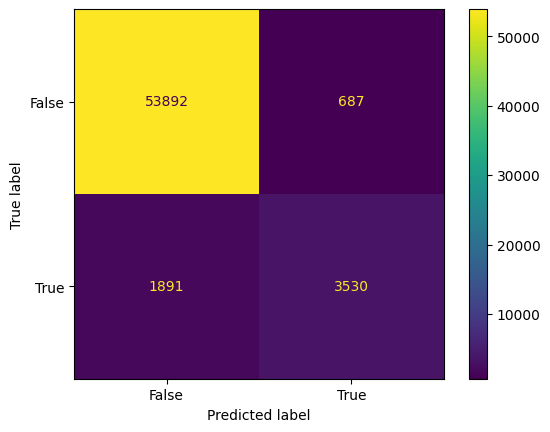

In [36]:
from sklearn.metrics import ConfusionMatrixDisplay

cm_display = ConfusionMatrixDisplay(cm,
                                    display_labels = sgd_clf.classes_)
cm_display.plot();

#### Accuracy, Precision, Recall, F1

- TP, TN, FP, FN all depend on which label is considered **postitive**
- In our case, it makes most sense for `False` to be negative and `True` to be positive, but we can do the calculations with the opposite assumption

In [37]:
# Assumption: `True` is positive
TN1 = cm[0, 0] # actual label is negative, predicted negative
FP1 = cm[0, 1] # actual label is negative, predicted positive
FN1 = cm[1, 0] # actual label is positive, predicted negative
TP1 = cm[1, 1] # actual label is positive, predicted positive

# Assumption: `True` is negative
TP0 = cm[0, 0] # actual label is positive, predicted positive
FN0 = cm[0, 1] # actual label is positive, predicted negative
FP0 = cm[1, 0] # actual label is negative, predicted positive
TN0 = cm[1, 1] # actual label is negative, predicted negative

Total = cm.sum()
Total

60000

##### Accuracy

$$
Accuracy = \frac{TP + TN}{Total}
$$

In [38]:
accuracy_score(y_train_5, y_train_pred)

0.9570333333333333

In [39]:
# for accuracy it's the same no matter which label
# is positive
accuracy1 = (TP1 + TN1) / Total
accuracy0 = (TP0 + TN0) / Total
accuracy1, accuracy0

(0.9570333333333333, 0.9570333333333333)

##### Precision

- Out of all those that were predicted to be positive (in our case predicted to be `5s`), what proportion did it get right?

$$
Precision = \frac{TP}{TP + FP}
$$

In [40]:
precision1 = precision_score(y_train_5, y_train_pred, pos_label=True)
precision0 = precision_score(y_train_5, y_train_pred, pos_label=False)
precision1, precision0

(0.8370879772350012, 0.9661007833927899)

In [41]:
precision1 = TP1 / (TP1 + FP1)
precision0 = TP0 / (TP0 + FP0)
precision1, precision0

(0.8370879772350012, 0.9661007833927899)

##### Recall

- Out of all those that were actual positive (in our case actual `5s`), what proportion did it get right?

$$
Recall = \frac{TP}{TP + FN}
$$

In [42]:
recall1 = recall_score(y_train_5, y_train_pred, pos_label=True)
recall0 = recall_score(y_train_5, y_train_pred, pos_label=False)
recall1, recall0

(0.6511713705958311, 0.987412741164184)

In [43]:
recall1 = TP1 / (TP1 + FN1)
recall0 = TP0 / (TP0 + FN0)
recall1, recall0

(0.6511713705958311, 0.987412741164184)

##### F1

The harmonic mean of precision and recall. Ranges from 0 to 1, with 1 being the best score.

$$
F1 = 2\times\frac{precision \times recall}{precision + recall}
$$

In [44]:
f1_1 = f1_score(y_train_5, y_train_pred, pos_label=True)
f1_0 = f1_score(y_train_5, y_train_pred, pos_label=False)
f1_1, f1_0

(0.7325171197343846, 0.9766405103205814)

In [45]:
f1_1 = 2 * (precision1 * recall1) / (precision1 + recall1)
f1_0 = 2 * (precision0 * recall0) / (precision0 + recall0)
f1_1, f1_0

(0.7325171197343846, 0.9766405103205814)

##### Classification Report

In [46]:
print(classification_report(y_train_5, y_train_pred))

              precision    recall  f1-score   support

       False       0.97      0.99      0.98     54579
        True       0.84      0.65      0.73      5421

    accuracy                           0.96     60000
   macro avg       0.90      0.82      0.85     60000
weighted avg       0.95      0.96      0.95     60000



In [47]:
(np.round(precision0, 2),
 np.round(recall0, 2),
 np.round(f1_0, 2),
 cm[0].sum())

(0.97, 0.99, 0.98, 54579)

In [48]:
(np.round(precision1, 2),
 np.round(recall1, 2),
 np.round(f1_1, 2),
 cm[1].sum())

(0.84, 0.65, 0.73, 5421)

In [49]:
(np.round(accuracy0, 2),
 cm.sum())

(0.96, 60000)

##### The Precision/Recall Trade-off

In [50]:
y_scores = cross_val_predict(
    sgd_clf,
    X_train,
    y_train_5,
    cv=3,
    method='decision_function'
)

y_scores

array([  1200.93051237, -26883.79202424, -33072.03475406, ...,
        13272.12718981,  -7258.47203373, -16877.50840447])

In [51]:
test = pd.DataFrame({'y_train_pred': y_train_pred,
                     'y_scores': y_scores,
                     'y_actual': y_train_5})
test

,y_train_pred,y_scores,y_actual
0,True,1200.930512,True
1,False,-26883.792024,False
2,False,-33072.034754,False
3,False,-15919.548069,False
4,False,-20003.539702,False
...,...,...,...
59995,False,-22415.238902,False
59996,False,-32535.811335,False
59997,True,13272.127190,True
59998,False,-7258.472034,False


In [52]:
test.groupby('y_train_pred')[['y_scores']].agg(['min', 'max'])

y_scores              
                        min           max
y_train_pred                             
False        -146348.567262     -2.254965
True               4.692390  49441.437659

In [53]:
test = test.sort_values('y_scores')
test

,y_train_pred,y_scores,y_actual
40394,False,-146348.567262,False
49838,False,-142300.007054,False
54403,False,-137588.975817,False
22698,False,-137155.626441,False
47715,False,-136254.058562,False
...,...,...,...
47972,True,36801.606970,True
44923,True,37026.251165,True
53497,True,38871.263919,True
55161,True,42216.055628,True


In [54]:
test[test['y_train_pred'] != test['y_actual']]

,y_train_pred,y_scores,y_actual
45602,False,-106527.453005,True
51740,False,-83117.290171,True
53470,False,-73598.146970,True
47737,False,-62675.509892,True
42121,False,-57917.804348,True
...,...,...,...
53854,True,28970.365255,False
56866,True,29187.089204,False
48649,True,31839.587325,False
46435,True,34547.447029,False


In [55]:
# `SGDClassifier uses a threshold of 0
threshold = 0
y_train_pred_threshold_0 = y_scores > 0
y_train_pred_threshold_0

array([ True, False, False, ...,  True, False, False])

In [56]:
sum(y_train_pred == y_train_pred_threshold_0), len(y_train_pred)

(60000, 60000)

In [57]:
recall_score(y_train_5, y_train_pred), recall_score(y_train_5, y_train_pred_threshold_0)

(0.6511713705958311, 0.6511713705958311)

###### What happens to Precision and Recall when the threshold changes?

In [58]:
# when threshold goes up, precision goes up
(precision_score(y_train_5, y_scores > -10_000),
 precision_score(y_train_5, y_scores > 0),
 precision_score(y_train_5, y_scores > 10_000))

(0.3528114663726571, 0.8370879772350012, 0.946656050955414)

In [59]:
# when threshold goes up, recall goes down
(recall_score(y_train_5, y_scores > -10_000),
 recall_score(y_train_5, y_scores > 0),
 recall_score(y_train_5, y_scores > 10_000))

(0.9444751890795057, 0.6511713705958311, 0.21933222652647114)

#### Precision/Recall Curve

##### Precision/Recall vs Decision Threshold

In [60]:
thresholds = np.linspace(-50_000, 50_000, 100)
precisions = [precision_score(y_train_5,
                              y_scores > t,
                              zero_division=1) for t in thresholds]
recalls = [recall_score(y_train_5,
                        y_scores > t) for t in thresholds]
f1s = [f1_score(y_train_5,
                y_scores > t) for t in thresholds]
accuracies = [accuracy_score(y_train_5,
                y_scores > t) for t in thresholds]

In [61]:
threshold = 3000
digit = y[0]
y_score = sgd_clf.decision_function([X[0]])
print('digit', digit)
y_some_digit_pred = (y_score > threshold)
print('digit prediction when threshold is 3000: ',
      y_some_digit_pred) # it is a 5, but predicted to not be a 5
print('digit prediction when threshold is 0: ', (y_score > 0))

digit 5
digit prediction when threshold is 3000:  [False]
digit prediction when threshold is 0:  [ True]


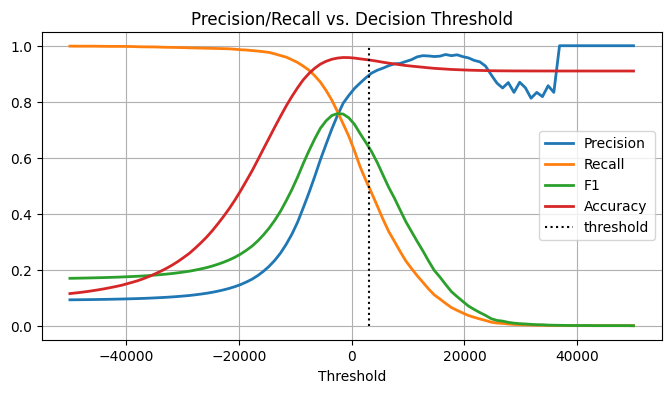

In [62]:
fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(thresholds, precisions, linewidth=2, label='Precision')
ax.plot(thresholds, recalls, linewidth=2, label='Recall')
ax.plot(thresholds, f1s, linewidth=2, label='F1')
ax.plot(thresholds, accuracies, linewidth=2, label='Accuracy')
ax.vlines(threshold, 0, 1.0, 'k', 'dotted', label='threshold')

ax.set_title('Precision/Recall vs. Decision Threshold')
ax.set_xlabel('Threshold')
ax.legend()
ax.grid();

In [63]:
# from sklearn.metrics import precision_recall_curve
# only works for a BINARY classifier

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

In [64]:
len(thresholds), len(recalls), len(precisions)

(60000, 60001, 60001)

In [65]:
thresholds

array([-146348.56726174, -142300.00705404, -137588.97581744, ...,
         38871.26391927,   42216.05562787,   49441.43765905])

In [66]:
thresholds >= threshold

array([False, False, False, ...,  True,  True,  True])

In [67]:
(thresholds >= threshold).argmax(), thresholds[(thresholds >= threshold).argmax()]

(56978, 3001.5895682301107)

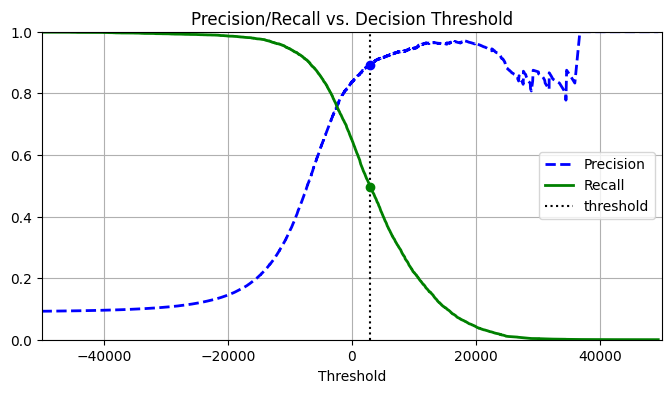

In [68]:
plt.figure(figsize=(8, 4))
plt.plot(thresholds, precisions[:-1], 'b--', label='Precision', linewidth=2)
plt.plot(thresholds, recalls[:-1], 'g-', label='Recall', linewidth=2)
plt.vlines(threshold, 0, 1.0, 'k', 'dotted', label='threshold')

idx = (thresholds > threshold).argmax()
plt.plot(thresholds[idx], precisions[idx], 'bo')
plt.plot(thresholds[idx], recalls[idx], 'go')

plt.axis([-50_000, 50_000, 0, 1])
plt.title('Precision/Recall vs. Decision Threshold')
plt.xlabel('Threshold')
plt.grid()
plt.legend(loc='center right')
plt.show()

- When the threshold is 3000, the precision is near 90% and the recall is about 50%
- Another way to select a good precision/recall trade-off is to plot pecision directly against recall

##### Precision/Recall Curve

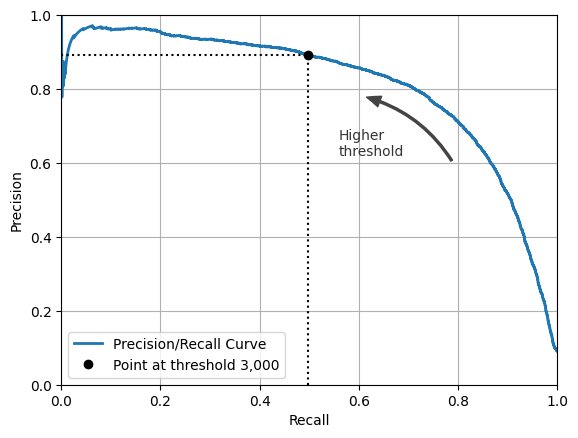

In [69]:
import matplotlib.patches as patches  # for the curved arrow

plt.plot(recalls[:-1],
         precisions[:-1],
         linewidth=2,
         label='Precision/Recall Curve')

plt.plot([0.0, recalls[idx]], [precisions[idx],  precisions[idx]], 'k:')
plt.plot([recalls[idx], recalls[idx]], [0,  precisions[idx]], 'k:')
plt.plot([recalls[idx]], [precisions[idx]], "ko",
         label="Point at threshold 3,000")

plt.gca().add_patch(patches.FancyArrowPatch(
    (0.79, 0.60), (0.61, 0.78),
    connectionstyle="arc3,rad=.2",
    arrowstyle="Simple, tail_width=1.5, head_width=8, head_length=10",
    color="#444444"))
plt.text(0.56, 0.62, "Higher\nthreshold", color="#333333")

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.axis([0, 1, 0, 1])
plt.grid()
plt.legend(loc='lower left')
plt.show()

- Notice that the precision really starts to drop at about 80% recall
- In general, it is best to select a precision/recall trade-off just before that drop (about 60% recall)
    - But the choice really depends on your project

- Suppose you aim for a 90% precision

In [70]:
idx_for_90_precision = (precisions >= 0.9).argmax()
idx_for_90_precision

57109

In [71]:
threshold_for_90_precision = thresholds[idx_for_90_precision]
threshold_for_90_precision

3370.0194991439557

- To makes predictions on the training set, instead of calling the classifiers predict method, you can run this code

In [72]:
y_train_pred_90 = (y_scores >= threshold_for_90_precision)
y_train_pred_90

array([False, False, False, ...,  True, False, False])

In [73]:
precision_score(y_train_5, y_train_pred_90)

0.9000345901072293

In [74]:
recall_at_90_precision = recall_score(y_train_5, y_train_pred_90)
recall_at_90_precision

0.4799852425751706

- Now we have a 90% precision classifier, but the recall isn't good.

#### The ROC Curve

- Useful information here: https://en.wikipedia.org/wiki/Precision_and_recall
- **Receiver Operating Characteristic (ROC) curve** is a tool used with binary classifiers
- Instead of plotting precision vs recall, it plots, the **true positive rate** (another name for recall) against the **false positive rate (FPR)**
- The FPR, aka the **fall-out** is the ratio of negative instances that are incorrectly classified as positive

$$
\text{Recall} = TPR = \frac{TP}{TP + FN}
$$

$$
\text{Fall-out} = FPR = \frac{FP}{FP + TN}
$$

In [75]:
# from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

- Since thresholds are listed in decreasing order in this case, we use `<=` instead of `>=`

In [76]:
thresholds

array([  49442.43765905,   49441.43765905,   36801.60697028, ...,
       -105763.22240074, -106527.45300471, -146348.56726174])

In [77]:
idx_for_threshold_at_90 = (thresholds <= threshold_for_90_precision).argmax()
tpr_90 , fpr_90 = tpr[idx_for_threshold_at_90], fpr[idx_for_threshold_at_90]

idx_for_threshold_at_90, tpr_90, fpr_90

(520, 0.4799852425751706, 0.005295076861063779)

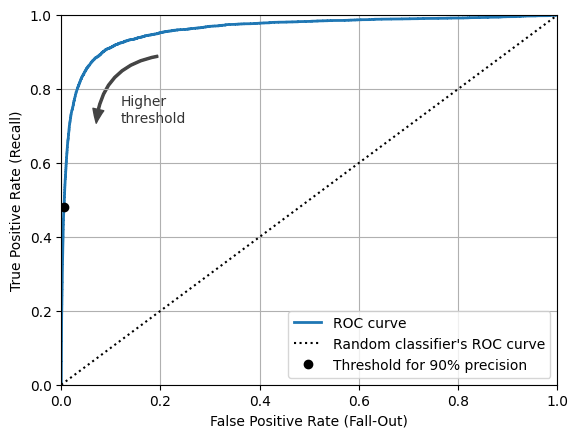

In [78]:
plt.plot(fpr, tpr, linewidth=2, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k:', label='Random classifier\'s ROC curve')
plt.plot(fpr_90, tpr_90, 'ko', label='Threshold for 90% precision')

# for the arrow and text description of the arrow
plt.gca().add_patch(patches.FancyArrowPatch(
    (0.20, 0.89), (0.07, 0.70),
    connectionstyle="arc3,rad=.4",
    arrowstyle="Simple, tail_width=1.5, head_width=8, head_length=10",
    color="#444444"))
plt.text(0.12, 0.71, "Higher\nthreshold", color="#333333")

plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.axis([0, 1, 0, 1])
plt.grid()
plt.legend(loc='lower right')
plt.show()

##### My Version of ROC Curve

In [79]:
def my_recall(y_true, y_pred):
    conf_m = confusion_matrix(y_true, y_pred)
    tp = conf_m[1, 1]
    fn = conf_m[1, 0]
    return tp / (tp + fn)

def my_fallout(y_true, y_pred):
    conf_m = confusion_matrix(y_true, y_pred)
    fp = conf_m[0, 1]
    tn = conf_m[0, 0]
    return fp / (fp + tn)

In [80]:
my_thresholds = np.linspace(thresholds.min(), thresholds.max(), 100)
my_tpr = [my_recall(y_train_5,
                    y_scores > t) for t in my_thresholds]
my_fpr = [my_fallout(y_train_5,
                    y_scores > t) for t in my_thresholds]

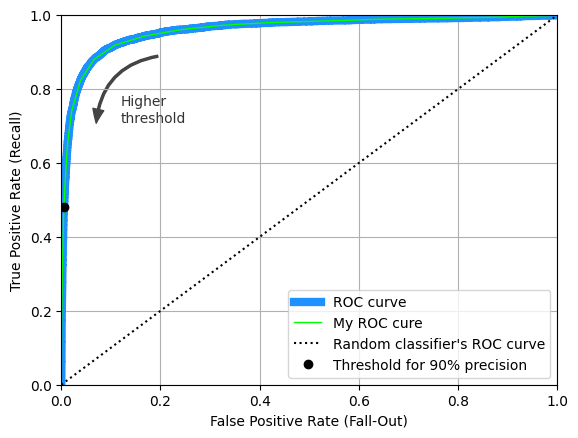

In [81]:
plt.plot(fpr, tpr, linewidth=6, label='ROC curve', c='dodgerblue')
plt.plot(my_fpr, my_tpr, linewidth=1, c='lime', label='My ROC cure')

plt.plot([0, 1], [0, 1], 'k:', label='Random classifier\'s ROC curve')
plt.plot(fpr_90, tpr_90, 'ko', label='Threshold for 90% precision')

# for the arrow and text description of the arrow
plt.gca().add_patch(patches.FancyArrowPatch(
    (0.20, 0.89), (0.07, 0.70),
    connectionstyle="arc3,rad=.4",
    arrowstyle="Simple, tail_width=1.5, head_width=8, head_length=10",
    color="#444444"))
plt.text(0.12, 0.71, "Higher\nthreshold", color="#333333")

plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.axis([0, 1, 0, 1])
plt.grid()
plt.legend(loc='lower right')
plt.show()

- The higher the recall (TPR), the higher the fall-out (FPR)
- The dotted line represntes the ROC curve of a purely random classifier
    - a good classifier stays as far away from that line as possible (toward the top-left corner)
- One way to compare classifiers is to measure the **area under the curve (AUC)**
    - a perfect classifier will have a **ROC AUC** equal to 1
    - a purely random classifier will have a **ROC AUC** equal to 0.5

In [82]:
# area under the curve: AUC

# from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.9604938554008616

##### Which to use: ROC Curve or Precision/Recall (PR) Curve?

- In general, use the PR curve whenever the positive class is rare, or when you care more about the false positives than the false negatives, otherwise, use the ROC curve
    - In our example, based on the ROC curve and the AUC, it looks like a really good classifier, but that is mostly because the positive class is rae
    - In contrast, the PR curve makes it clear that the classifier has room for improvement (curve could be closer to the top-right corner)

##### A `RandomForstClassifier` to compare to our `SGDClassifier`

In [83]:
# from sklearn.ensemble import RandomForestClassifier